<a href="https://colab.research.google.com/github/tgarcia14/DigitalBuilders/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration
# **Data Science 4330 Fall 2024**
Digital Builders

1. Tony Garcia - tgarcia@angelo.edu
2. Kevin Minzenmayer - kminzenmayer@angelo.edu
3. YaeEun Yi - yyi@angelo.edu

https://catalog.data.gov/dataset/data-breach-notifications-affecting-washington-residents

Data Breaches affecting Washington residents from 2017 to 2024

Packages to Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels as sm

Downloaded a JSON file

In [ ]:
import requests
url = 'https://data.wa.gov/api/views/sb4j-ca4h/rows.json?accessType=DOWNLOAD'
response = requests.get(url)
data = response.json()
records = data['data']
column_names = [column['name'] for column in data['meta']['view']['columns']]
data_breach_df = pd.DataFrame(records, columns=column_names)
data_breach_df

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,DateAware,DateSubmitted,...,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,EntityState
0,row-egai.3q7c.i8y8,00000000-0000-0000-A145-A7FEB0F42491,0,1732417204,None,1732417204,None,{ },2021-02-04T00:00:00,2021-03-17T00:00:00,...,4,0,4,True,4,None,False,41,1-99,None
1,row-ri29~7vk3-3inf,00000000-0000-0000-5CCC-673A7C50C7FA,0,1732417204,None,1732417204,None,{ },2019-12-20T00:00:00,2021-03-17T00:00:00,...,None,None,None,False,None,None,False,453,Unknown,None
2,row-vng4~sm7a-wuqk,00000000-0000-0000-1563-B498AF0F1416,0,1732417204,None,1732417204,None,{ },2021-02-22T00:00:00,2021-03-17T00:00:00,...,0,60,60,False,5,55,False,23,1-99,None
3,row-zzj8-ix22_aci9,00000000-0000-0000-ECBF-838B1CB5DE7A,0,1732417204,None,1732417204,None,{ },2020-05-24T00:00:00,2021-03-18T00:00:00,...,None,0,None,False,None,None,False,298,Unknown,None
4,row-6eqj_bdhs_rxpp,00000000-0000-0000-7DDD-825EF193E996,0,1732417204,None,1732417204,None,{ },2021-01-18T00:00:00,2021-03-19T00:00:00,...,0,6,6,True,6,None,True,60,1-99,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,row-ba52~buvr_mhha,00000000-0000-0000-365D-FFEA5D67F347,0,1732417204,None,1732417204,None,{ },2024-02-21T00:00:00,2024-08-03T00:00:00,...,0,4,4,False,3,1,False,164,1-99,MN
1209,row-rkkc-f9x6_bvpn,00000000-0000-0000-6B86-B30B06E499EF,0,1732417204,None,1732417204,None,{ },2024-06-11T00:00:00,2024-08-05T00:00:00,...,0,16,16,False,2,14,False,55,1-99,WA
1210,row-uaxn_9j7a_wr7i,00000000-0000-0000-F9AC-7FA4FB8E5998,0,1732417204,None,1732417204,None,{ },2024-03-02T00:00:00,2024-08-13T00:00:00,...,0,9,9,True,9,None,True,164,1-99,ID
1211,row-aqwu~9twu-yfup,00000000-0000-0000-5F3C-212442A1B534,0,1732417204,None,1732417204,None,{ },2024-04-01T00:00:00,2024-09-09T00:00:00,...,0,0,0,True,0,None,True,161,0,IL


raw data

Inital data types

In [ ]:
data_breach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   sid                                1213 non-null   object
 1   id                                 1213 non-null   object
 2   position                           1213 non-null   int64 
 3   created_at                         1213 non-null   int64 
 4   created_meta                       0 non-null      object
 5   updated_at                         1213 non-null   int64 
 6   updated_meta                       0 non-null      object
 7   meta                               1213 non-null   object
 8   DateAware                          1190 non-null   object
 9   DateSubmitted                      1213 non-null   object
 10  DataBreachCause                    1213 non-null   object
 11  DateStart                          1073 non-null   object
 12  DateEn

Data cleaning for missing information with replacement by means and conversion to numeric or integer datatypes

In [ ]:
# Copy the DataFrame to avoid modifying the original
cleaned_df = data_breach_df.copy()

# Remove unnecessary columns (if any)
# Example: Drop columns like 'ID' or any irrelevant text-heavy fields
cleaned_df = cleaned_df.drop(['DateEnd'], axis=1)
cleaned_df = cleaned_df.drop(['Id'], axis=1)
cleaned_df = cleaned_df.drop(['EntityState'], axis=1)
# Handle missing values
# Here, missing data with impute data
cleaned_df['CyberattackType'] = cleaned_df['CyberattackType'].fillna('Other')
cleaned_df['BusinessType'] = cleaned_df['BusinessType'].fillna('Other')
cleaned_df['DataBreachCause'] = cleaned_df['DataBreachCause'].fillna('Unknown/unclear')

# Convert data types if needed
# Convert 'DateAware' and 'DateSubmitted' columns to datetime objects for analysis
cleaned_df['DateAware'] = pd.to_datetime(cleaned_df['DateAware'])
cleaned_df['DateSubmitted'] = pd.to_datetime(cleaned_df['DateSubmitted'])

# Standardize string values (if needed)
# Example: Convert all string data to lowercase for consistency
for column in cleaned_df.select_dtypes(include=['object']):
    cleaned_df[column] = cleaned_df[column].str.lower()

#Converts WashingtonAffected to an INT
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].fillna(0).astype(int)
cleaned_df['WashingtoniansAffected'] = cleaned_df['WashingtoniansAffected'].astype(int)
# Remove duplicates
cleaned_df = cleaned_df.drop_duplicates()

# Check for inconsistencies or outliers in numeric columns
# Example: Check for outliers in 'WashingtoniansAffected' and 'DaysToContainBreach'
print(cleaned_df['WashingtoniansAffected'].describe())
print(cleaned_df['DaysToContainBreach'].describe())

# Optional: Handle specific outliers or inconsistencies
# Example: Remove extreme outliers based on domain knowledge
# cleaned_df = cleaned_df[cleaned_df['WashingtoniansAffected'] < threshold_value]
# Mean imputation for 'DaysToContainBreach' column
####
cleaned_df['DaysToContainBreach'] = pd.to_numeric(cleaned_df['DaysToContainBreach'], errors='coerce')
cleaned_df['DaysToContainBreach'] = cleaned_df['DaysToContainBreach'].fillna(cleaned_df['DaysToContainBreach'].mean()).astype(int)

#Mean imputation for  Days to Identify and conversion to Int
####
cleaned_df.loc[:, 'DaysToIdentifyBreach'] = pd.to_numeric(cleaned_df['DaysToIdentifyBreach'], errors='coerce')
cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
# Mean imputations for Days of exposure and conversion to Int
cleaned_df.loc[:, 'DaysOfExposure'] = pd.to_numeric(cleaned_df['DaysOfExposure'], errors='coerce')
cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)

#Mean imputation for DaysBreachLifecycle and conversion to Int
cleaned_df.loc[:, 'DaysBreachLifecycle'] = pd.to_numeric(cleaned_df['DaysBreachLifecycle'], errors='coerce')
cleaned_df['DaysBreachLifecycle'] = cleaned_df['DaysBreachLifecycle'].fillna(cleaned_df['DaysBreachLifecycle'].mean()).astype(int)

#DaysElapsedBetweenEndAndDiscovery
cleaned_df.loc[:, 'DaysElapsedBetweenEndAndDiscovery'] = pd.to_numeric(cleaned_df['DaysElapsedBetweenEndAndDiscovery'], errors='coerce')
cleaned_df['DaysElapsedBetweenEndAndDiscovery'] = cleaned_df['DaysElapsedBetweenEndAndDiscovery'].fillna(cleaned_df['DaysElapsedBetweenEndAndDiscovery'].mean()).astype(int)

#DaysElapsedBeforeNotification
cleaned_df.loc[:, 'DaysElapsedBeforeNotification'] = pd.to_numeric(cleaned_df['DaysElapsedBeforeNotification'], errors='coerce')
cleaned_df['DaysElapsedBeforeNotification'] = cleaned_df['DaysElapsedBeforeNotification'].fillna(cleaned_df['DaysElapsedBeforeNotification'].mean()).astype(int)


cleaned_df.drop('sid', axis=1, inplace=True)
cleaned_df.drop('id', axis=1, inplace=True)
cleaned_df.drop('position', axis=1, inplace=True)
cleaned_df.drop('created_at', axis=1, inplace=True)
cleaned_df.drop('created_meta', axis=1, inplace=True)
cleaned_df.drop('updated_at', axis=1, inplace=True)
cleaned_df.drop('updated_meta', axis=1, inplace=True)
cleaned_df.drop('meta', axis=1, inplace=True)

cleaned_df['DateStart'] = pd.to_datetime(cleaned_df['DateStart'])

cleaned_df['Year'] = cleaned_df['Year'].astype(int)
cleaned_df['YearText'] = cleaned_df['YearText'].astype(int)
# Show the first few rows of the cleaned dataset
cleaned_df.head(200)



count    1.213000e+03
mean     3.035297e+04
std      1.783883e+05
min      0.000000e+00
25%      8.100000e+02
50%      1.687000e+03
75%      6.586000e+03
max      3.243664e+06
Name: WashingtoniansAffected, dtype: float64
count     982
unique     62
top         0
freq      771
Name: DaysToContainBreach, dtype: object


<ipython-input-131-85085205a1c6>:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysToIdentifyBreach'] = cleaned_df['DaysToIdentifyBreach'].fillna(cleaned_df['DaysToIdentifyBreach'].mean()).astype(int)
<ipython-input-131-85085205a1c6>:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df['DaysOfExposure'] = cleaned_df['DaysOfExposure'].fillna(cleaned_df['DaysOfExposure'].mean()).astype(int)
<ipython-input-131-85085205a1c6>:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in 

,DateAware,DateSubmitted,DataBreachCause,DateStart,Name,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,Year,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,2021-02-04,2021-03-17,cyberattack,2021-02-04,automatic funds transfer services inc.,ransomware,695,finance,other,2021,...,1-99,4,0,4,True,4,72,False,41,1-99
1,2019-12-20,2021-03-17,cyberattack,NaT,pcs revenue control systems,phishing,11807,business,professional services,2021,...,unknown,5,118,123,False,93,72,False,453,unknown
2,2021-02-22,2021-03-17,cyberattack,2020-12-24,western union retail money transfer partner,malware,1555,finance,other,2021,...,1-99,0,60,60,False,5,55,False,23,1-99
3,2020-05-24,2021-03-18,cyberattack,2020-05-24,manson counstruction co.,unclear/unknown,1049,business,construction,2021,...,unknown,5,0,123,False,93,72,False,298,unknown
4,2021-01-18,2021-03-19,cyberattack,2021-01-12,cancer treatment centers of america,phishing,579,health,other,2021,...,1-99,0,6,6,True,6,72,True,60,1-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-07-13,2020-08-19,cyberattack,2020-05-13,american payroll association,malware,548,business,other,2021,...,1-99,0,61,61,True,61,72,True,37,1-99
196,2020-07-16,2020-08-18,cyberattack,2020-02-07,university of south carolina,ransomware,1165,education,other,2021,...,100-199,0,160,160,False,103,57,False,33,100-199
197,2020-07-16,2020-08-17,cyberattack,2020-02-07,washington state university foundation,ransomware,334219,non-profit/charity,other,2021,...,100-199,0,160,160,False,103,57,False,32,100-199
198,2020-07-17,2020-08-17,cyberattack,2020-02-07,phi kappa psi fraternity,ransomware,677,finance,other,2021,...,100-199,0,161,161,False,103,58,False,31,100-199


Data that can be worked with

Cleaned Data , some changed to datetime and integers, with numerical and categorical features

# Identifying numerical and categorical features

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   DateAware                          1190 non-null   datetime64[ns]
 1   DateSubmitted                      1213 non-null   datetime64[ns]
 2   DataBreachCause                    1213 non-null   object        
 3   DateStart                          1073 non-null   datetime64[ns]
 4   Name                               1213 non-null   object        
 5   CyberattackType                    1213 non-null   object        
 6   WashingtoniansAffected             1213 non-null   int64         
 7   IndustryType                       1213 non-null   object        
 8   BusinessType                       1213 non-null   object        
 9   Year                               1213 non-null   int64         
 10  YearText                           1

In [ ]:
cleaned_df.shape

(1213, 22)

1213 data breaches or rows and 22 descriptive columns

In [ ]:
cleaned_df.describe(include="all")

,DateAware,DateSubmitted,DataBreachCause,DateStart,Name,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,Year,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
count,1190,1213,1213,1073,1213,1213,1.213000e+03,1213,1213,1213.000000,...,1213,1213.000000,1213.000000,1213.000000,1213,1213.000000,1213.000000,1213,1213.000000,1213
unique,NaN,NaN,3,NaN,1172,6,NaN,6,24,NaN,...,8,NaN,NaN,NaN,2,NaN,NaN,2,NaN,8
top,NaN,NaN,cyberattack,NaN,fred hutchinson cancer center,other,NaN,business,other,NaN,...,1-99,NaN,NaN,NaN,False,NaN,NaN,False,NaN,1-99
freq,NaN,NaN,882,NaN,3,433,NaN,550,766,NaN,...,533,NaN,NaN,NaN,687,NaN,NaN,898,NaN,523
mean,2021-04-01 05:36:24.201680896,2021-06-09 00:01:11.228359424,NaN,2020-12-15 08:16:33.103448064,NaN,NaN,3.035297e+04,NaN,NaN,2021.408079,...,NaN,5.582852,118.725474,123.311624,NaN,93.394889,72.039571,NaN,95.309975,NaN
min,2014-09-17 00:00:00,2015-08-11 00:00:00,NaN,2008-04-01 00:00:00,NaN,NaN,0.000000e+00,NaN,NaN,2016.000000,...,NaN,0.000000,-503.000000,-503.000000,NaN,-503.000000,1.000000,NaN,0.000000,NaN
25%,2020-06-02 06:00:00,2020-07-21 00:00:00,NaN,2019-12-18 00:00:00,NaN,NaN,8.100000e+02,NaN,NaN,2020.000000,...,NaN,0.000000,4.000000,8.000000,NaN,3.000000,57.000000,NaN,32.000000,NaN
50%,2021-06-08 00:00:00,2021-09-24 00:00:00,NaN,2021-04-19 00:00:00,NaN,NaN,1.687000e+03,NaN,NaN,2022.000000,...,NaN,0.000000,49.000000,87.000000,NaN,50.000000,72.000000,NaN,59.000000,NaN
75%,2023-03-12 06:00:00,2023-06-30 00:00:00,NaN,2023-02-24 00:00:00,NaN,NaN,6.586000e+03,NaN,NaN,2023.000000,...,NaN,5.000000,132.000000,129.000000,NaN,96.000000,72.000000,NaN,119.000000,NaN
max,2024-06-13 00:00:00,2024-09-09 00:00:00,NaN,2024-06-13 00:00:00,NaN,NaN,3.243664e+06,NaN,NaN,2025.000000,...,NaN,366.000000,3728.000000,3728.000000,NaN,2240.000000,3453.000000,NaN,1043.000000,NaN


this table shows usable data, more numerically

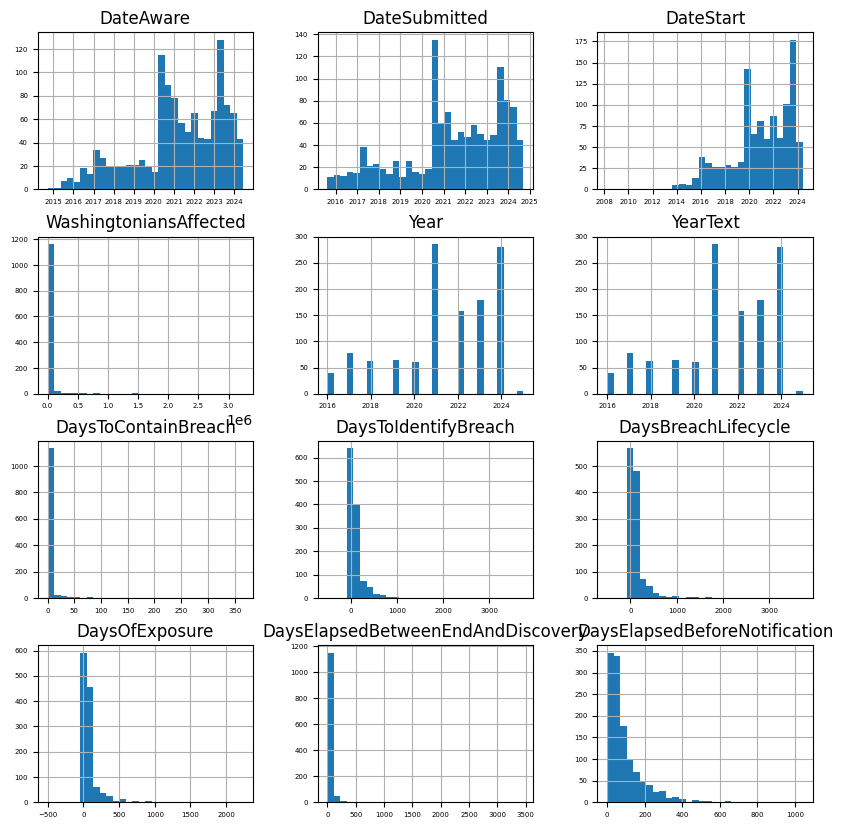

In [ ]:
axes = cleaned_df.hist(figsize=(10, 10),bins=30)
for ax in axes.flatten():
    ax.tick_params(labelsize=5)

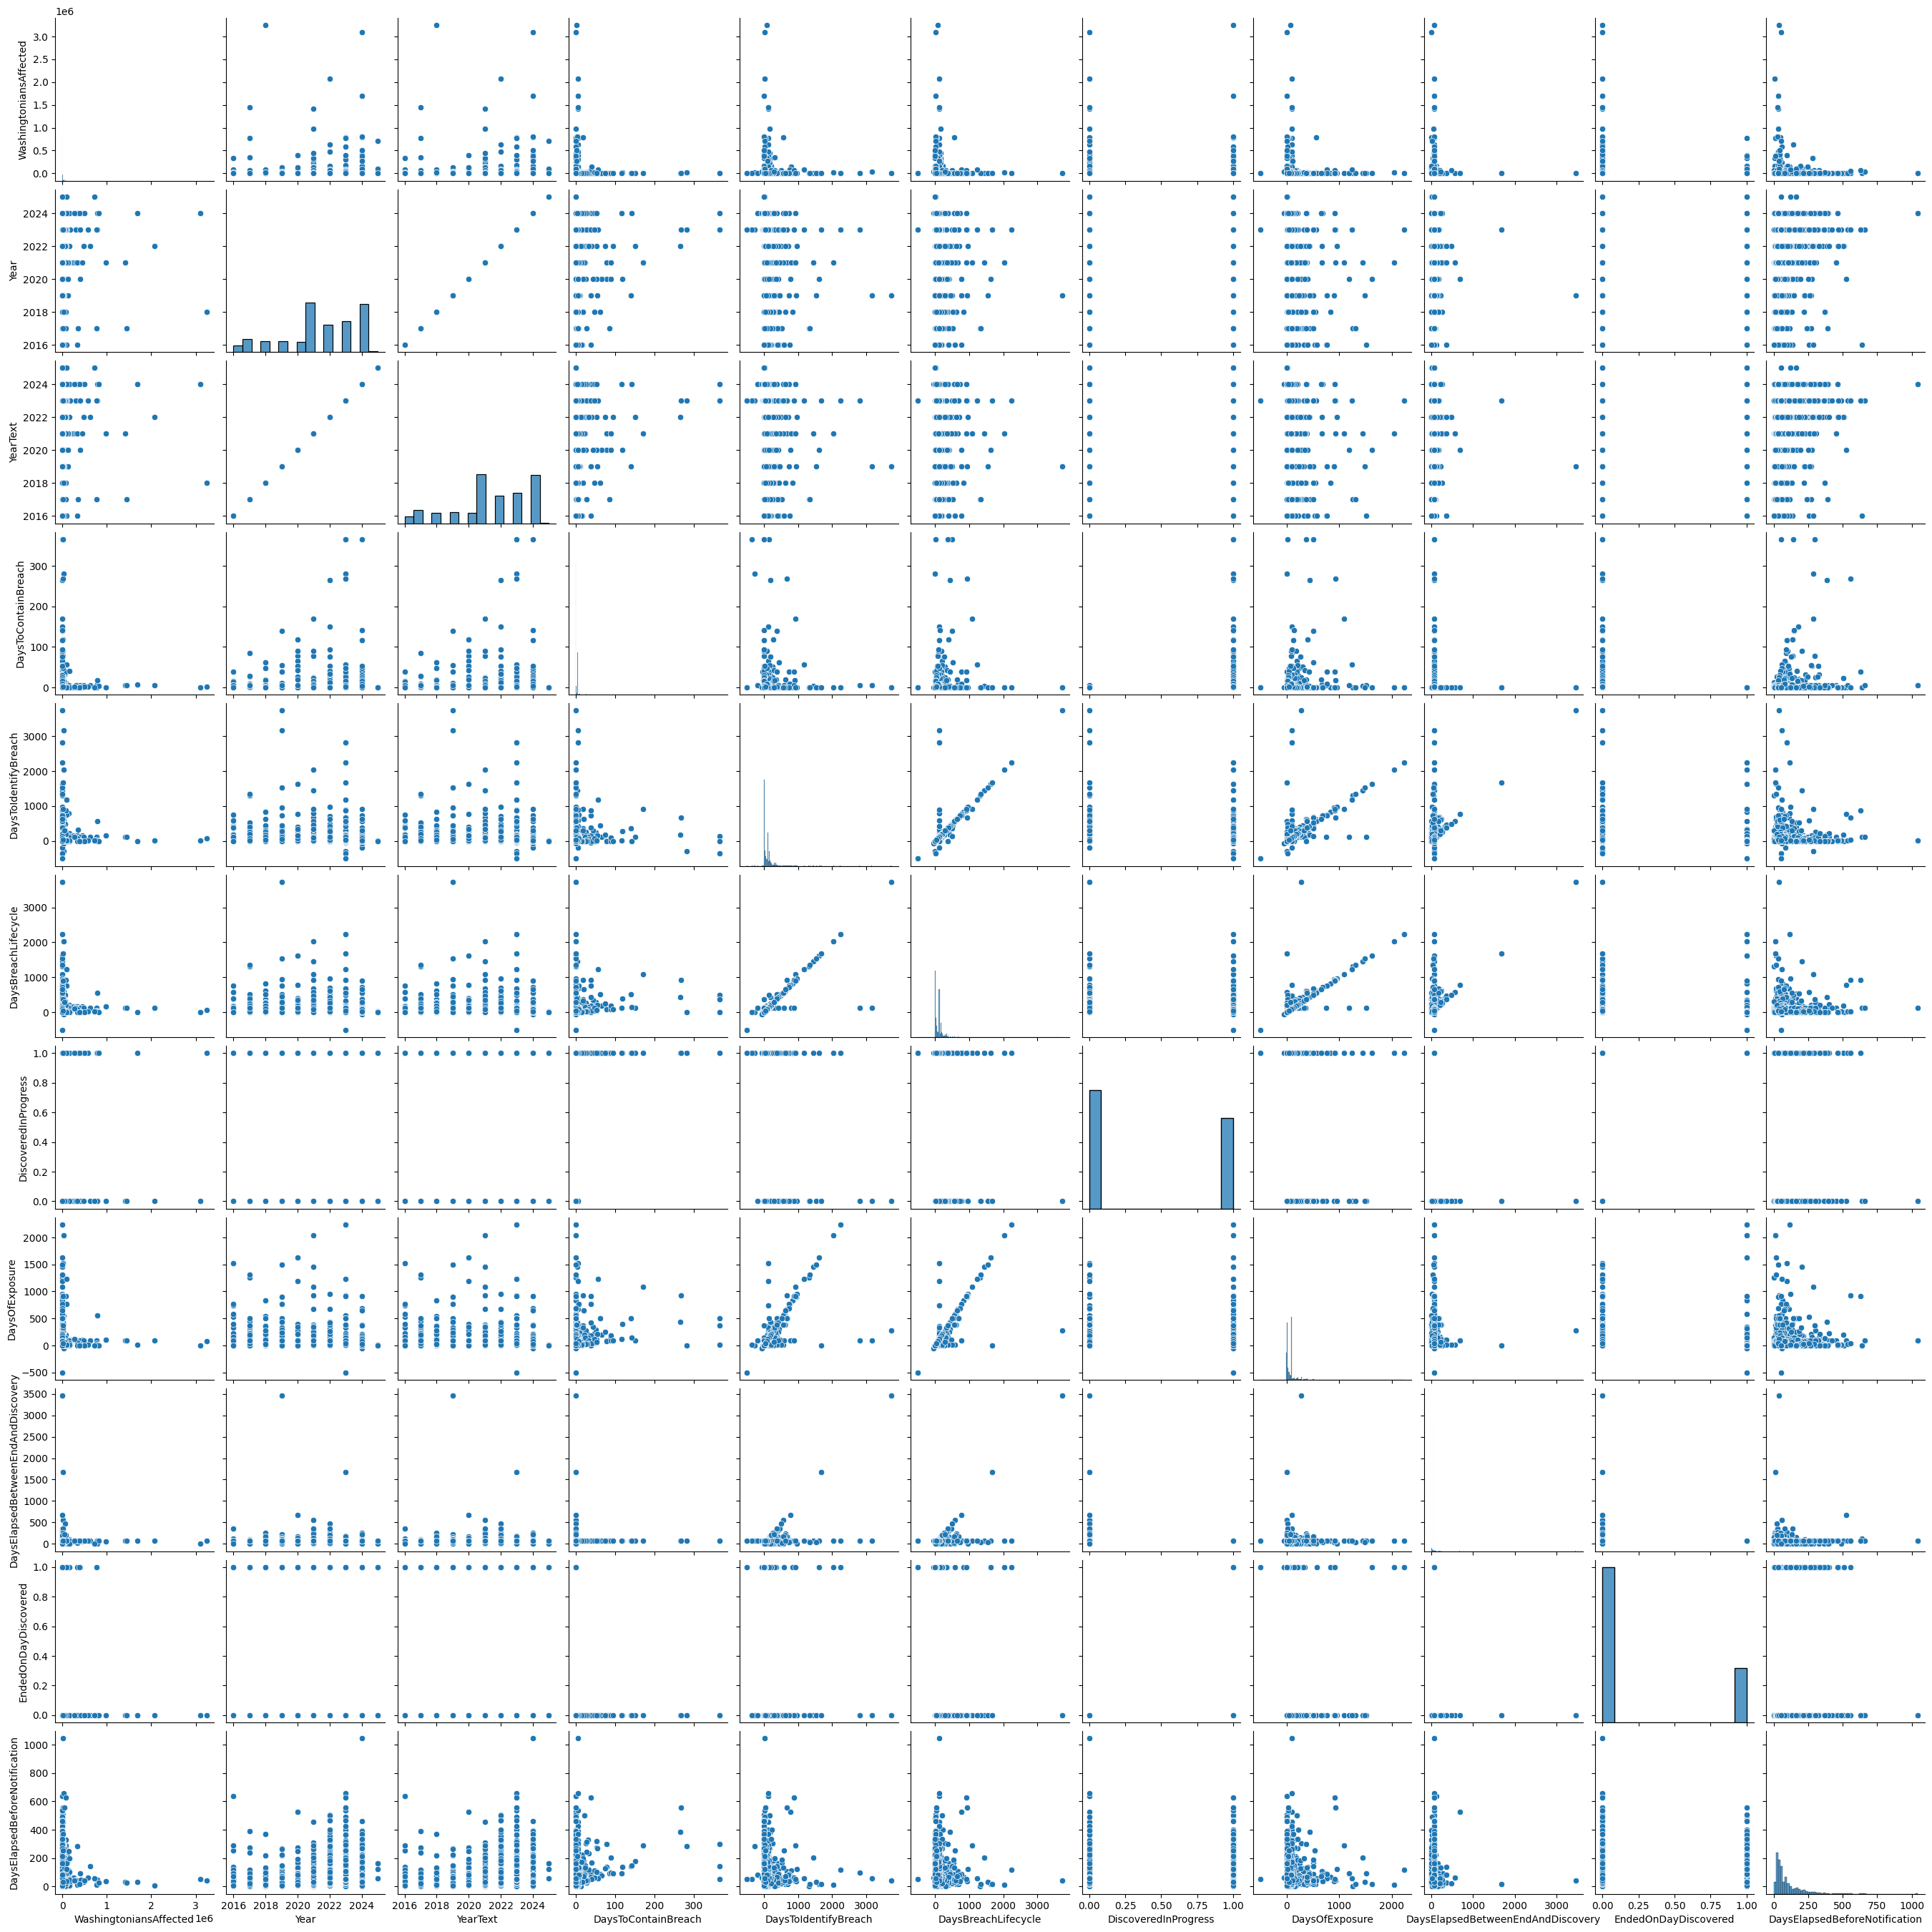

In [ ]:
sns.pairplot(cleaned_df)

next are the column or data descriptions, with categories for some of the columns

In [ ]:
cleaned_df['DataBreachCause'].unique()

array(['cyberattack', 'theft or mistake', 'unauthorized access'],
      dtype=object)

In [ ]:
cleaned_df['Name'].unique()

array(['automatic funds transfer services inc.',
       'pcs revenue control systems',
       'western union retail money transfer partner', ...,
       'kootenai health', 'kemper sports management, llc',
       'community loan servicing llc'], dtype=object)

In [ ]:
cleaned_df['CyberattackType'].unique()

array(['ransomware', 'phishing', 'malware', 'unclear/unknown', 'other',
       'skimmers'], dtype=object)

In [ ]:
cleaned_df['IndustryType'].unique()

array(['finance', 'business', 'health', 'non-profit/charity', 'education',
       'government'], dtype=object)

In [ ]:
cleaned_df['BusinessType'].unique()

array(['other', 'professional services', 'construction', 'software',
       'real estate', 'accessories', 'home', 'retail', 'consumable',
       'transportation', 'shipping', 'legal', 'manufacturing',
       'telecommunications', 'clothing', 'hospitality', 'fitness',
       'human resources', 'entertainment', 'cosmetic', 'biotech',
       'web services', 'cleaning', 'cryptocurrency'], dtype=object)

In [ ]:
cleaned_df['WashingtoniansAffectedRange'].unique()

array(['500-999', '10,000-49,999', '1,000-9,999', '50,000-999,999',
       '1,000,000+', 'unknown', '< 500'], dtype=object)

In [ ]:
cleaned_df['BreachLifecycleRange'].unique()

array(['1-99', 'unknown', '500+', '300-399', '100-199', '400-499',
       '200-299', '0'], dtype=object)

In [ ]:
cleaned_df['DaysOfExposureRange'].unique()

array(['1-99', 'unknown', '500+', '300-399', '100-199', '200-299', '0',
       '400-499'], dtype=object)

In [ ]:
cleaned_df['DateAware'].describe()

,DateAware
count,1190
mean,2021-04-01 05:36:24.201680896
min,2014-09-17 00:00:00
25%,2020-06-02 06:00:00
50%,2021-06-08 00:00:00
75%,2023-03-12 06:00:00
max,2024-06-13 00:00:00


In [ ]:
cleaned_df['DateSubmitted'].describe()

,DateSubmitted
count,1213
mean,2021-06-09 00:01:11.228359424
min,2015-08-11 00:00:00
25%,2020-07-21 00:00:00
50%,2021-09-24 00:00:00
75%,2023-06-30 00:00:00
max,2024-09-09 00:00:00


In [ ]:
cleaned_df['DateStart'].describe()

,DateStart
count,1073
mean,2020-12-15 08:16:33.103448064
min,2008-04-01 00:00:00
25%,2019-12-18 00:00:00
50%,2021-04-19 00:00:00
75%,2023-02-24 00:00:00
max,2024-06-13 00:00:00


In [ ]:
cleaned_df['WashingtoniansAffected'].describe()

,WashingtoniansAffected
count,1.213000e+03
mean,3.035297e+04
std,1.783883e+05
min,0.000000e+00
25%,8.100000e+02
50%,1.687000e+03
75%,6.586000e+03
max,3.243664e+06


In [ ]:
cleaned_df['Year'].describe()

,Year
count,1213.000000
mean,2021.408079
std,2.292008
min,2016.000000
25%,2020.000000
50%,2022.000000
75%,2023.000000
max,2025.000000


In [ ]:
cleaned_df['YearText'].describe()

,YearText
count,1213.000000
mean,2021.408079
std,2.292008
min,2016.000000
25%,2020.000000
50%,2022.000000
75%,2023.000000
max,2025.000000


In [ ]:
cleaned_df['DaysToContainBreach'].describe()

,DaysToContainBreach
count,1213.000000
mean,5.582852
std,26.108035
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,366.000000


In [ ]:
cleaned_df['DaysToIdentifyBreach'].describe()

,DaysToIdentifyBreach
count,1213.000000
mean,118.725474
std,251.297149
min,-503.000000
25%,4.000000
50%,49.000000
75%,132.000000
max,3728.000000


In [ ]:
cleaned_df['DaysBreachLifecycle'].describe()

,DaysBreachLifecycle
count,1213.000000
mean,123.311624
std,219.757683
min,-503.000000
25%,8.000000
50%,87.000000
75%,129.000000
max,3728.000000


In [ ]:
cleaned_df['DaysOfExposure'].describe()

,DaysOfExposure
count,1213.000000
mean,93.394889
std,185.922080
min,-503.000000
25%,3.000000
50%,50.000000
75%,96.000000
max,2240.000000


In [ ]:
cleaned_df['DaysElapsedBetweenEndAndDiscovery'].describe()

,DaysElapsedBetweenEndAndDiscovery
count,1213.000000
mean,72.039571
std,117.167056
min,1.000000
25%,57.000000
50%,72.000000
75%,72.000000
max,3453.000000


In [ ]:
cleaned_df['DaysElapsedBeforeNotification'].describe()

,DaysElapsedBeforeNotification
count,1213.000000
mean,95.309975
std,98.293473
min,0.000000
25%,32.000000
50%,59.000000
75%,119.000000
max,1043.000000


From the plots below, some work needs to be done to also analyze data without some very significant outliers

# Histogram

categorical feature cyberattack type

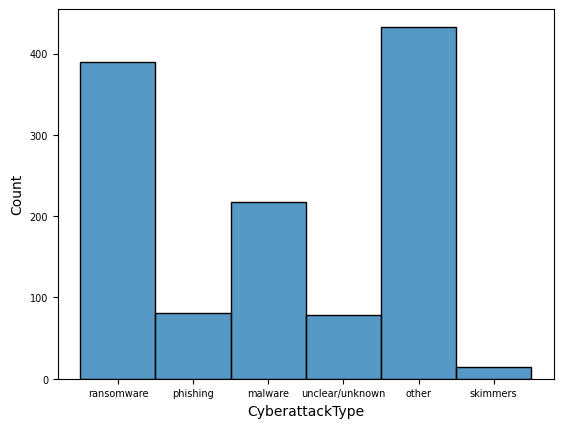

In [ ]:
b = sns.histplot(x='CyberattackType', data=cleaned_df)
b.tick_params(labelsize=7)
plt.show()
# shows the number of different types of attacks

this shows the number of different cyberattack types with most being ransomware or unidentified

# Bar chart

categorical feature count of industry type

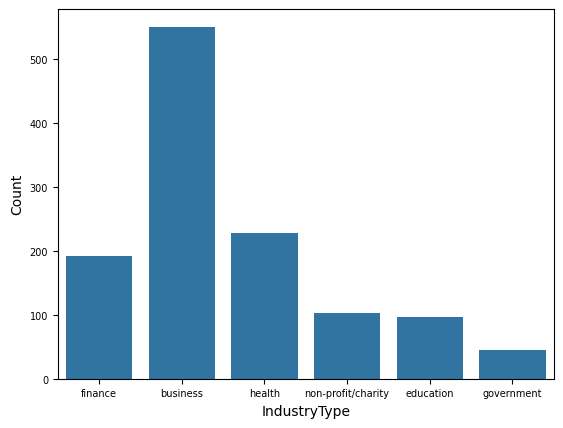

In [ ]:
b = sns.countplot(x='IndustryType', data=cleaned_df)
b.tick_params(labelsize=7)
plt.ylabel("Count")
plt.show()
# areas where breaches are

number of the types of industry where the breaches occur with a lot being in the business sector

# Density plot

numerical feature days to identify breach

<Axes: xlabel='DaysToIdentifyBreach', ylabel='Density'>

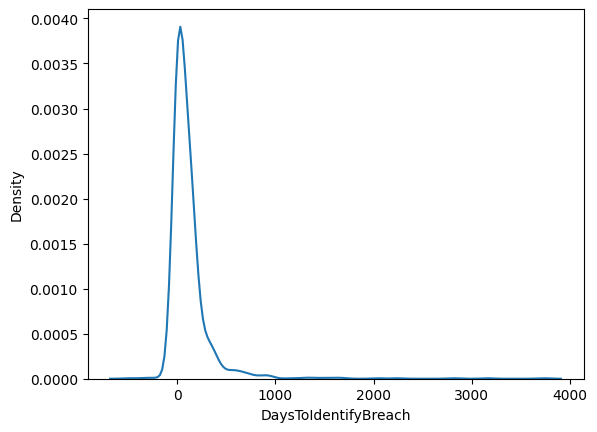

In [ ]:
sns.kdeplot(x='DaysToIdentifyBreach', data=cleaned_df)
# density of amount of time to identify a breach

for the days to identify a breach, there is a centalized distribution with a lot of the breaches near the mean, this might have been changed by mean replacement with the data cleaning

# Boxplot

numerical feature, number of washington residents affected

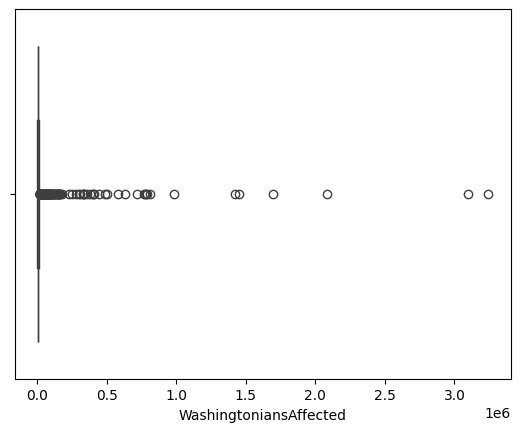

In [ ]:
sns.boxplot(x='WashingtoniansAffected', data=cleaned_df)
plt.show()
# from thousands of people affected in the area nearly all the time to only a few were between one to four million people affected

a lot of values lie way outside two or three standard deviations for the number of residents that are affected, there are many outliers

another histogram

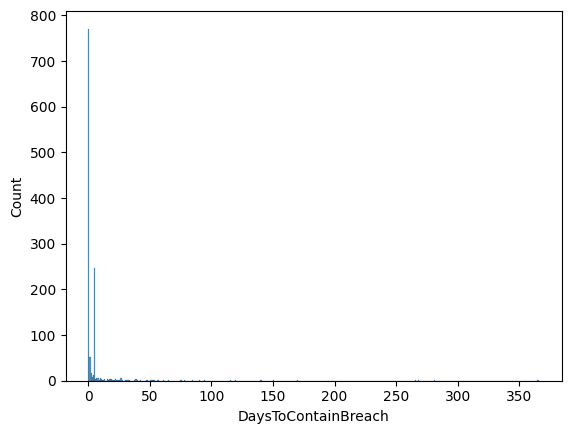

In [ ]:
sns.histplot(x='DaysToContainBreach', data=cleaned_df)
plt.show()
# very skewed, most breaches contained in a far smaller amount of time

like the next plot, the days to contain the breaches is very skewed with many outliers

# Boxplot of days to contain breach

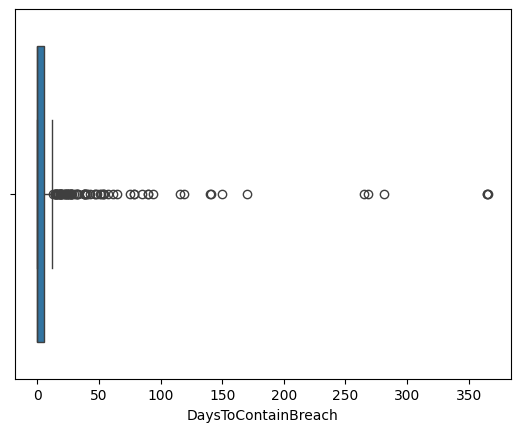

In [ ]:
sns.boxplot(x='DaysToContainBreach', data=cleaned_df)
plt.show()
# another representation of the time to contain breaches

for the days to contain the breaches, there are a lot outside the middle quartile that take a lot longer, this data is very skewed with a lot of outliers

In [ ]:
cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach','DaysBreachLifecycle','DaysOfExposure','DaysElapsedBetweenEndAndDiscovery','DaysElapsedBeforeNotification']]

,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,DaysElapsedBeforeNotification
0,4,0,4,4,72,41
1,5,118,123,93,72,453
2,0,60,60,5,55,23
3,5,0,123,93,72,298
4,0,6,6,6,72,60
...,...,...,...,...,...,...
1208,0,4,4,3,1,164
1209,0,16,16,2,14,55
1210,0,9,9,9,72,164
1211,0,0,0,0,72,161


another bar chart

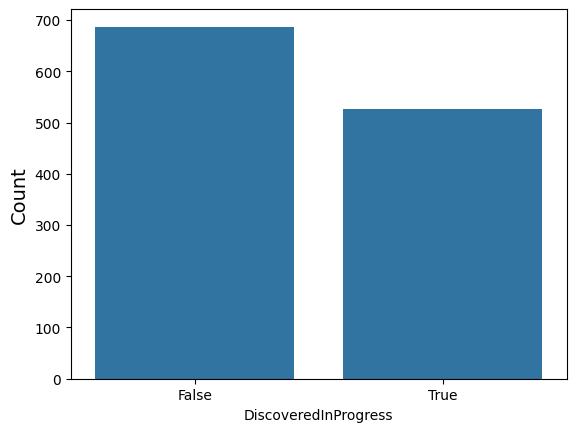

In [ ]:
p = sns.countplot(data=cleaned_df, x='DiscoveredInProgress')
p.set_ylabel('Count', fontsize=14)
plt.show()
# nearly half of breaches discovered quickly

nearly half of breaches are discovered while they happen

another countplot

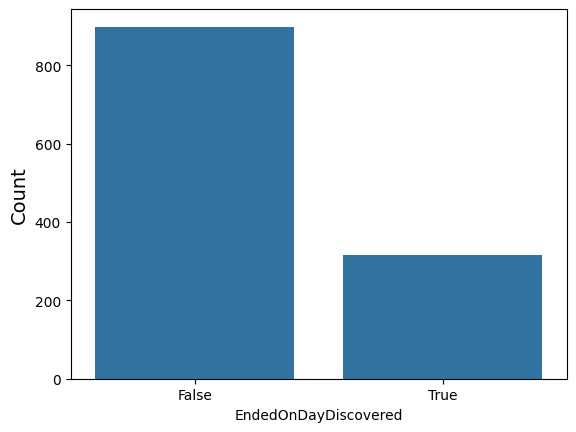

In [ ]:
p = sns.countplot(data=cleaned_df, x='EndedOnDayDiscovered')
p.set_ylabel('Count', fontsize=14)
plt.show()
# most security breaches not solved immediately
# need to investigate more on the time it usually takes

most breaches are not contained within a day when they happen

# Violin plot

<Axes: xlabel='Year'>

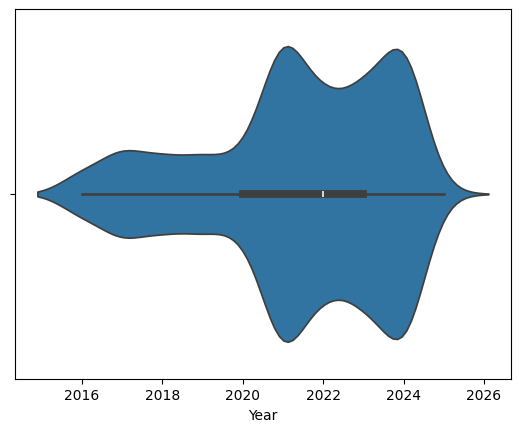

In [ ]:
sns.violinplot(x='Year', data=cleaned_df)

over the last decade there have been a lot more threats

# Scatterplot

Text(0.5, 1.0, 'Efficiency')

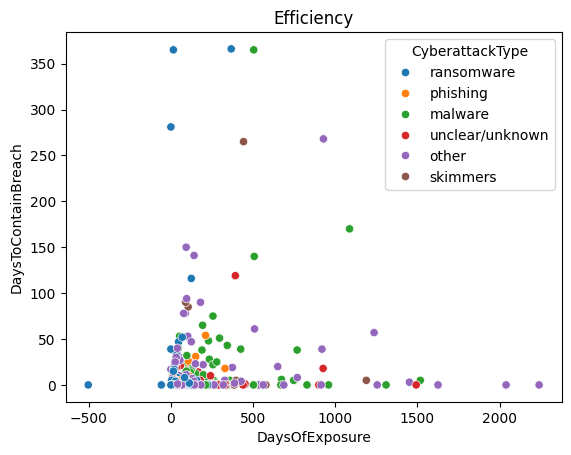

In [ ]:
sns.scatterplot(data=cleaned_df, x='DaysOfExposure', y='DaysToContainBreach', hue='CyberattackType')
plt.title("Efficiency")
# the time something occurred and the time it was fixed varies, or time known

most types are all contained and exposed within a far smaller range than a few of the others

# Swarmplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='DataBreachCause', ylabel='DaysToIdentifyBreach'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


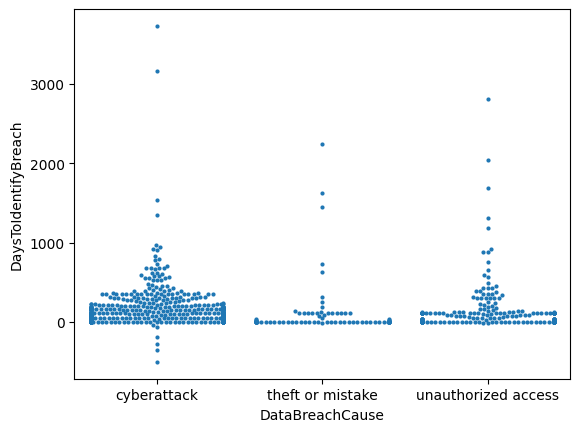

In [ ]:
xlist = []
ylist = []
i = 0
for i in range(1200):
  xlist.append('DataBreachCause[i]')
  ylist.append('DaysToIdentifyBreach[i]')
  i += 10
sns.swarmplot(data=cleaned_df, x='DataBreachCause', y='DaysToIdentifyBreach',size=3)
# a convenience sample was done because of the amount of data
# changing the marker size did not help very much, it just made it harder to read
# the same with the striplot

there are more days in more cases to identify a breach that is a cyberattack instead of the other two

# Histogram of the breach cycle range

the lifecycle was put together to read

{'1-99': 533, 'unknown': 249, '500+': 46, '300-399': 55, '100-199': 173, '400-499': 12, '200-299': 53, '0': 92}


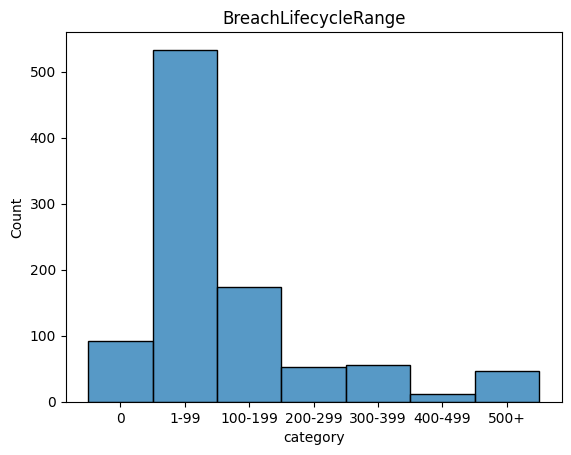

In [ ]:
count = {}
for BreachLifecycleRange in cleaned_df['BreachLifecycleRange']:
  if BreachLifecycleRange in count:
    count[BreachLifecycleRange] += 1
  else:
    count[BreachLifecycleRange] = 1
print(count)

data = pd.DataFrame(list(count.items()), columns = ['category', 'count'])
category_order = ['0','1-99','100-199','200-299','300-399','400-499','500+']
data['category'] = pd.Categorical(data['category'], categories=category_order, ordered=True)
data = data.sort_values('category')
sns.histplot(data=data, x='category', weights='count', discrete=True)
plt.title('BreachLifecycleRange')
plt.show()
# there looks like there is a distribution and is skewed to the right

this shows the number of breaches found within a range of days for the breach life cycle range

# Strip plot

<Axes: xlabel='DaysToIdentifyBreach', ylabel='BusinessType'>

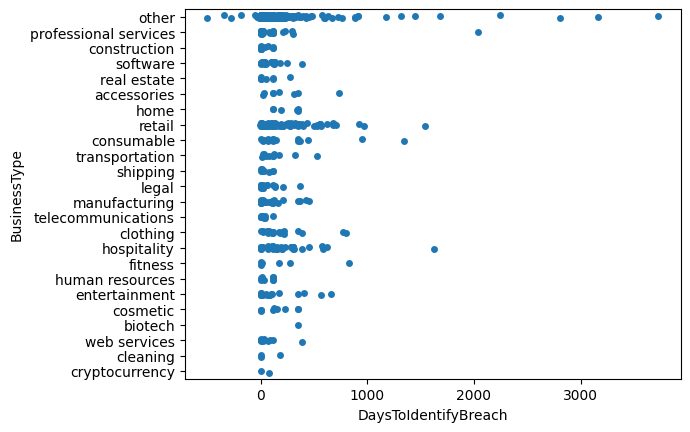

In [ ]:
xlist = []
ylist = []
i = 0
for i in range(1200):
  xlist.append('Year[i]')
  ylist.append('DaysToContainBreach[i]')
  i += 10
sns.stripplot(data=cleaned_df, x='DaysToIdentifyBreach', y='BusinessType')
# the types of businesses and the time before breaches are shown

some business types had less days for when the breach was identified

# Scatter Matrix

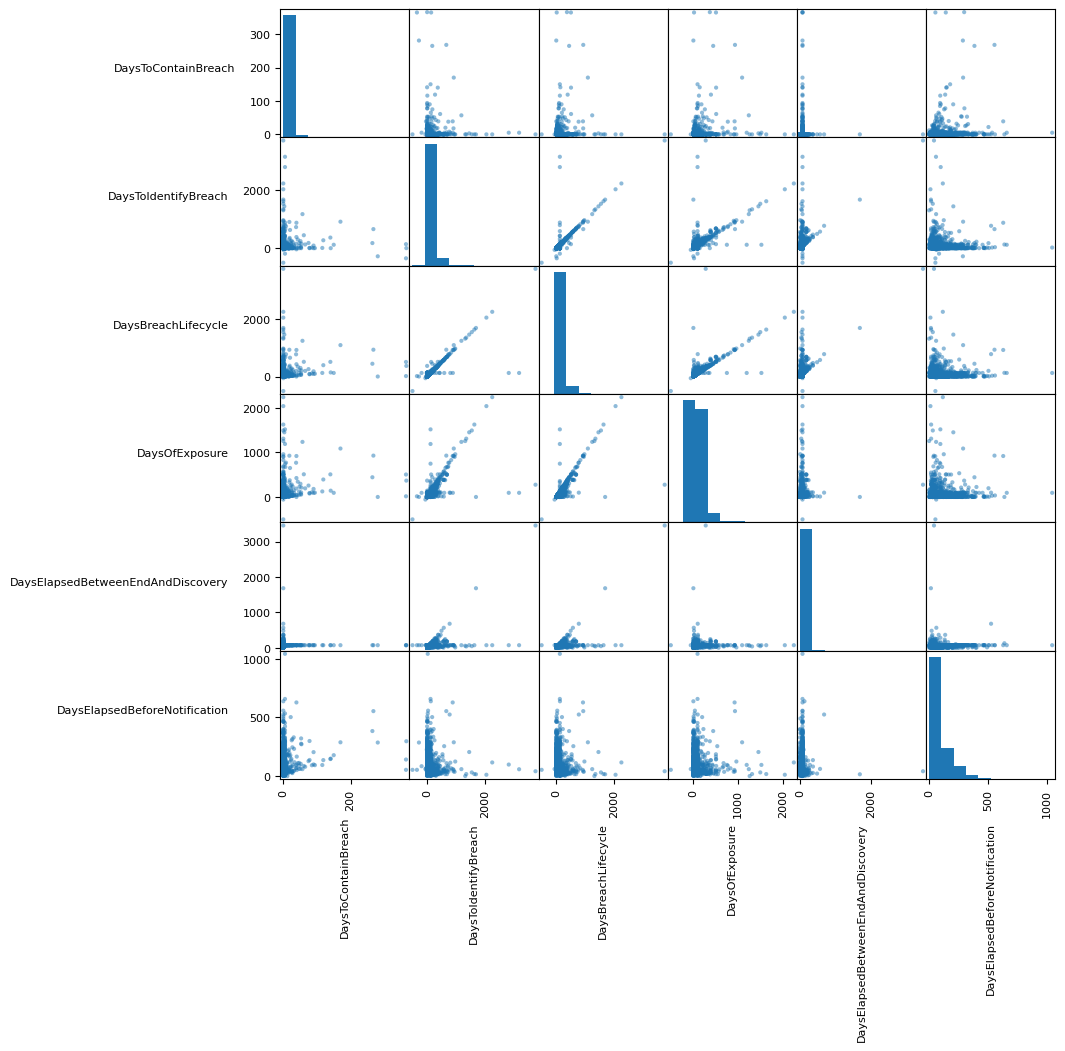

In [ ]:
scatter = pd.plotting.scatter_matrix(cleaned_df[['DaysToContainBreach','DaysToIdentifyBreach','DaysBreachLifecycle','DaysOfExposure','DaysElapsedBetweenEndAndDiscovery','DaysElapsedBeforeNotification']],figsize=(10,10))
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8,rotation=90)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8,rotation=0,labelpad=10,ha='right')
plt.show()

these can be compared to identify any relationships